In [38]:
import seaborn as sns
from Scripts import project_functions as pf # This is called a relative import
df = pf.load_and_process("../../data/raw/understat.com.csv")
df

,league,year,position,team,matches,scored,missed,pts,xG,xG_diff,xGA,xpts,xpts_diff,pts_per_game
0,La_liga,2014,1,Barcelona,38,110,21,94,102.980152,-7.019848,28.444293,94.0813,0.0813,2.473684
1,La_liga,2014,2,Real Madrid,38,118,38,92,95.766243,-22.233757,42.607198,81.7489,-10.2511,2.421053
2,La_liga,2014,3,Atletico Madrid,38,67,29,78,57.047670,-9.952330,29.069107,73.1353,-4.8647,2.052632
3,La_liga,2014,4,Valencia,38,70,32,77,55.062500,-14.937500,39.392572,63.7068,-13.2932,2.026316
4,La_liga,2014,5,Sevilla,38,71,45,76,69.526624,-1.473376,47.862742,67.3867,-8.6133,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,Ligue_1,2019,16,Dijon,28,27,37,30,27.378050,0.378050,39.300382,31.1870,1.1870,1.071429
584,Ligue_1,2019,17,Saint-Etienne,28,29,45,30,29.651493,0.651493,37.725643,32.6755,2.6755,1.071429
585,Ligue_1,2019,18,Nimes,28,29,44,27,30.193755,1.193755,40.473400,32.6876,5.6876,0.964286
586,Ligue_1,2019,19,Amiens,28,31,50,23,25.619869,-5.380131,38.426209,32.8361,9.8361,0.821429


<AxesSubplot:>

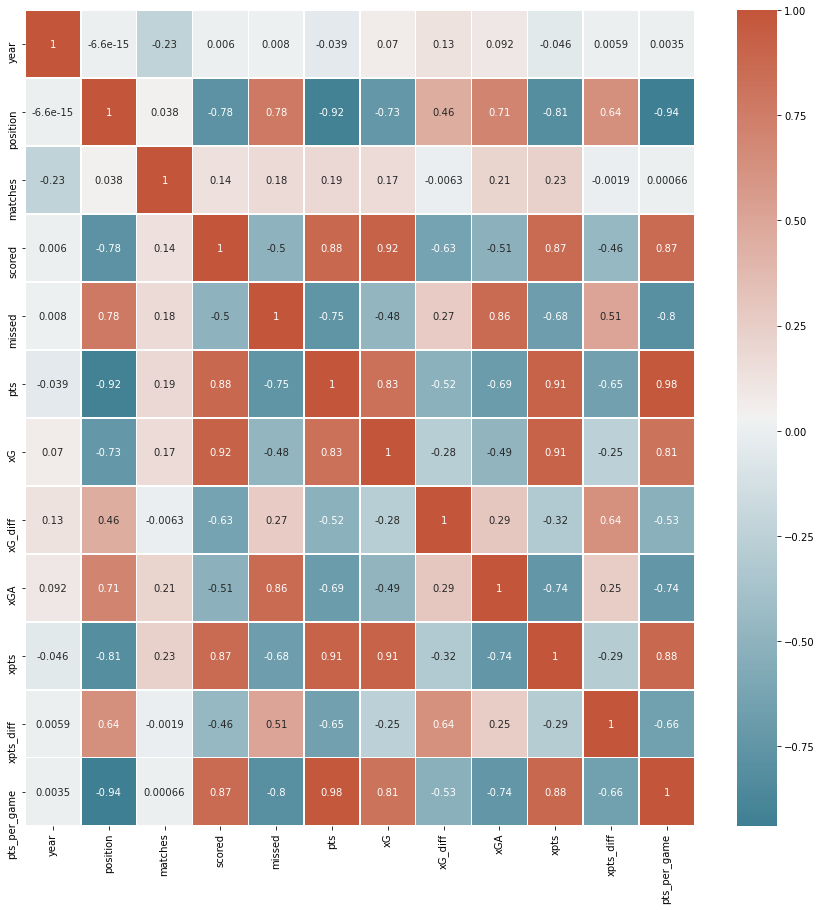

In [32]:
import matplotlib.pyplot as plt
# Heatmap to find out relationships between different variables and recognise trends

fig, ax = plt.subplots(figsize=(15,15))
corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True),linewidths=0.5, ax=ax)

<AxesSubplot:xlabel='xG', ylabel='xGA'>

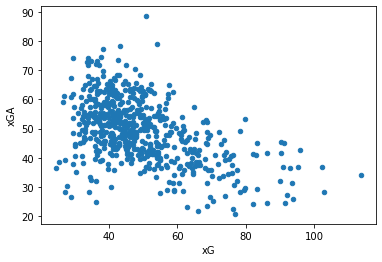

In [34]:
#xG, xGA
df.plot(kind='scatter', x='xG', y='xGA')

,xG,xGA,xpts_diff,pts_per_game
position,,,,
1,68.643320,31.524344,-11.6828,2.289474
2,75.815441,40.499403,-5.9018,2.078947
3,69.802591,35.718825,0.1740,1.973684


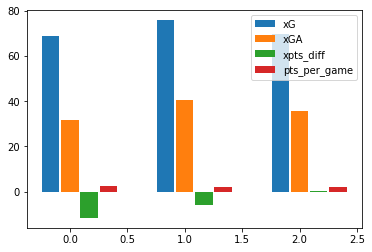

In [48]:
from matplotlib import pyplot as plt


df_EPL= pf.data_filter("EPL",2014)
df_EPL = df_EPL.drop(columns=['team','year','scored','matches','missed','pts','xG_diff','xpts','league'])
df_EPL = df_EPL[df_EPL['position']<=3]
df_EPL = df_EPL.set_index('position')
display(df_EPL)

def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True):
    """Draws a bar plot with multiple bars per data point.

    Parameters
    ----------
    ax : matplotlib.pyplot.axis
        The axis we want to draw our plot on.

    data: dictionary
        A dictionary containing the data we want to plot. Keys are the names of the
        data, the items is a list of the values.

        Example:
        data = {
            "x":[1,2,3],
            "y":[1,2,3],
            "z":[1,2,3],
        }

    colors : array-like, optional
        A list of colors which are used for the bars. If None, the colors
        will be the standard matplotlib color cyle. (default: None)

    total_width : float, optional, default: 0.8
        The width of a bar group. 0.8 means that 80% of the x-axis is covered
        by bars and 20% will be spaces between the bars.

    single_width: float, optional, default: 1
        The relative width of a single bar within a group. 1 means the bars
        will touch eachother within a group, values less than 1 will make
        these bars thinner.

    legend: bool, optional, default: True
        If this is set to true, a legend will be added to the axis.
    """

    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys())

        
fig, ax = plt.subplots()
bar_plot(ax, df_EPL, total_width=0.5, single_width=.9)
plt.show()
